In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(7007)  # for reproducibility

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Can create a linear stack of layers.
from keras.models import Sequential
# Basically the core layers of any neural network.
from keras.layers import Dense, Dropout, Activation, Flatten
# Specifically CNN layers.
from keras.layers import Conv2D, MaxPooling2D
# Useful utilities
from keras.utils import np_utils

In [3]:
"""
This example creates a sequential model with a single
dense layer with 10 outputs. Note that we need to specify
the input shape.
"""

m = Sequential([Dense(10, input_shape=(10,)), 
                Activation('linear') ])

In [4]:
"""
We also need to compile a model. This sets up important
parts like its optimizer, loss function, and the metrics
by which we measure the model's success.
"""
m.compile(optimizer = 'rmsprop', loss = 'mse', 
              metrics = ['mse', 'mae'])

To fix the error that was occurring, I just ran:

/Applications/Python\ 3.6/Install\ Certificates.command

A much more elegant way to import data, but not for Kaggle.
Loads in the MNIST dataset:

from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
# This reads in the test.csv file stored in the same folder as this notebook on my machine.
# The test variable here is a pandas DataFrame.
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
# Previews the imported data. Right now every image is one row. 
# We need to fix that.
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# We now put the datasets into numpy arrays.
np_train = train.values
np_test = test.values
print(np_train.shape)
print(type(np_train))

(42000, 785)
<class 'numpy.ndarray'>


In [8]:
# These format the arrays so that the images are now grids instead of rows.
# We also extract the labels for the training data as Y_train.

X_train = np_train[:,1:]
X_train = np.reshape(X_train, (len(X_train), 28, 28))
Y_train = np_train[:,0]
X_test = np.reshape(np_test, (len(np_test), 28, 28, 1))

In [9]:
print(X_train.shape)
# 42,000 training examples, each 28 by 28.

(42000, 28, 28)


In [10]:
# This works as one might expect.
print(len(X_train))

42000


8 5
1 4


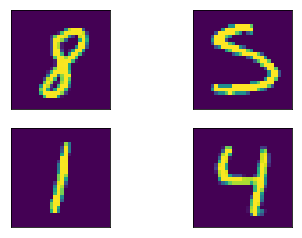

In [11]:
# Randomly plots four examples from the training data.
# Also prints their labels from the training data labels.
fig, axes = plt.subplots(nrows = 2, ncols = 2)
nums = []
for i in range(4):
    num = np.random.randint(0, len(X_train))
    nums.append(num)

# Removes ticks from all 4 subplots in one line.
plt.setp(axes, xticks = [], yticks = [])
    
k = 0
for i in range(2):
    for j in range(2):
        axes[i,j].imshow(X_train[nums[k]])
        k += 1

print(Y_train[nums[0]], Y_train[nums[1]])
print(Y_train[nums[2]], Y_train[nums[3]])

In [12]:
# This shows what the data actually looks like to the machine.
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,188,255,94,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,191,250,253,93,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,123,248,253,167,10,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,247,253,208,13,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,253,235,77,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,253,88,0,0,0,0,0,0,0,0


In [13]:
# We need to format the data into the description:
#              n, depth, width, height.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(42000, 28, 28, 1)


In [14]:
# It's also wise to standardize the data type as float32.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
# Finally, we should normalize the data to the range [0,1].
X_train /= 255
X_test /= 255

In [16]:
# Oh no, we want a separate vector for each possible label.
print(Y_train.shape)

(42000,)


In [17]:
# Peeps the first 10 elements of Y-train.
print(Y_train[:10])

[1 0 1 4 0 0 7 3 5 3]


In [18]:
# Turns each possible label into a binary vector.
Y_train = np_utils.to_categorical(Y_train, 10)

In [19]:
# This is better.
print(Y_train.shape)

(42000, 10)


In [20]:
# Moving right along, let's establish our model.
model = Sequential()
# We also add the first layer, the input layer.
"""
The format of the Conv2D arguments is:
filters : integer
kernal_size : tuple
strides : tuple (optional, default is (1,1))
activation : String
    Options include softmax, elu, relu, softplus, 
    softsign, tanh, sigmoid, and more.
input_shape : tuple
"""
model.add(Conv2D(32, (3, 3), strides = (1, 1), 
        activation = "relu", input_shape = (28, 28, 1)))

In [21]:
# Allows us to check the shape of the output of our model.
print(model.output_shape)

(None, 26, 26, 32)


In [22]:
# The first hidden layer.
model.add(Conv2D(32, (3, 3), activation = 'relu'))
# The first pooling layer. 
model.add(MaxPooling2D(pool_size = (2, 2)))
# First dropout layer.
model.add(Dropout(0.25))
# Then check our shape.
print(model.output_shape)

(None, 12, 12, 32)


In [23]:
# The second hidden layer.
model.add(Conv2D(16, (2, 2), activation = "relu"))
# Second dropout layer.
model.add(Dropout(0.15))
# Then check our shape.
print(model.output_shape)

(None, 11, 11, 16)


In [24]:
# The Flatten layer merges all filters together.
model.add(Flatten())
print(model.output_shape)

(None, 1936)


In [25]:
# We add a fully connected layer, dropout one last time, and
# then have our final layer.
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "sigmoid"))

In [26]:
# Once we have all our layers, we can compile the model.
"""
The metrics argument allows us to specify different metrics
for different outputs.
"""
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [27]:
"""
Trains the model for a given number of epochs.
batch_size determines how many samples to use for each 
    gradient update.
epochs is the number of epochs to train the model. Each epoch
    is an iteration over the entire X, Y sets.
verbose has three possible settings:
    0 would be silent.
    1 would be a progress bar.
    2 would be a message for each epoch.
"""
model.fit(X_train, Y_train, 
          batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
42000/42000 [==============================] - 76s 2ms/step - loss: 0.3492 - acc: 0.8961
Epoch 2/5
42000/42000 [==============================] - 62s 1ms/step - loss: 0.1116 - acc: 0.9666
Epoch 3/5
42000/42000 [==============================] - 61s 1ms/step - loss: 0.0856 - acc: 0.9750
Epoch 4/5
42000/42000 [==============================] - 69s 2ms/step - loss: 0.0707 - acc: 0.9788
Epoch 5/5
42000/42000 [==============================] - 65s 2ms/step - loss: 0.0627 - acc: 0.9808


In [35]:
# This evaluates the model on the training data. 
# We have no test data from Kaggle, so this is the next best thing.
score = model.evaluate(X_train, Y_train, verbose = 1)

42000/42000 [==============================] - 18s 436us/step


In [36]:
# These are the loss and metrics values.
score

[0.02266451657642167, 0.9930714285714286]

Up to this point in the notebook, this article was the main source I used:

https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-1

In [37]:
# Creates a numpy array of our algorithm's predictions on the test dataset.
predictions = model.predict_classes(X_test, verbose = 1)
print(predictions.shape)
print(type(predictions))

28000/28000 [==============================] - 12s 418us/step
(28000,)
<class 'numpy.ndarray'>


In [38]:
# And then this exports our predictions to a csv file.
# Note that the submission suggestion was 1-indexed. Ugh.
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("predictions.csv", index = False)

Beyond all of that testing and training, we want the ability to save what our model has learned so far. I used the source below:

https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [25]:
def saveModel(model, fileName):
    """
    Saves a given Keras model into a json and .h5 file.
    
    Parameters
    ----------
    model : Keras model
        The model to be saved.
    fileName : String
        The main name of the files.
    """
    # Serialize model to JSON:
    json_string = fileName + ".json"
    model_json = model.to_json()
    with open(json_string, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    h5_string = fileName + ".h5"
    model.save_weights(h5_string)
    print("Saved model to disk")
    
# saveModel(model, "model_one")

In [20]:
def loadModel(fileName):
    """
    Loads a given Keras model from a json and .h5 file.
    
    Parameters
    ----------
    fileName : String
        The main name of the files.
    """
    
    #Load model from json.
    json_string = fileName + ".json"
    json_file = open(json_string, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    
    from keras.models import model_from_json
    loaded_model = model_from_json(loaded_model_json)
    
    # Load weights into new model.
    h5_string = fileName + ".h5"
    loaded_model.load_weights(h5_string)
    print("Loaded model from disk")
    return loaded_model
    
new_model = loadModel("fifteen_epochs")

Loaded model from disk


In [21]:
new_model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [22]:
new_model.fit(X_train, Y_train, 
          batch_size = 32, epochs = 15, verbose = 1)

Epoch 1/15
42000/42000 [==============================] - 68s 2ms/step - loss: 0.0270 - acc: 0.9917
Epoch 2/15
42000/42000 [==============================] - 68s 2ms/step - loss: 0.0269 - acc: 0.9918
Epoch 3/15
42000/42000 [==============================] - 68s 2ms/step - loss: 0.0237 - acc: 0.9927
Epoch 4/15
42000/42000 [==============================] - 63s 2ms/step - loss: 0.0230 - acc: 0.9929
Epoch 5/15
42000/42000 [==============================] - 63s 1ms/step - loss: 0.0219 - acc: 0.9932
Epoch 6/15
42000/42000 [==============================] - 61s 1ms/step - loss: 0.0275 - acc: 0.9914
Epoch 7/15
42000/42000 [==============================] - 61s 1ms/step - loss: 0.0278 - acc: 0.9915
Epoch 8/15
42000/42000 [==============================] - 62s 1ms/step - loss: 0.0243 - acc: 0.9920
Epoch 9/15
42000/42000 [==============================] - 62s 1ms/step - loss: 0.0268 - acc: 0.9922
Epoch 10/15
42000/42000 [==============================] - 61s 1ms/step - loss: 0.0249 - acc: 0.9922

In [23]:
score = new_model.evaluate(X_train, Y_train, verbose = 1)
score

42000/42000 [==============================] - 18s 435us/step


[0.002306405416967393, 0.9994761904761905]

In [26]:
saveModel(new_model, "thirty_epochs")

Saved model to disk


In [27]:
predictions = new_model.predict_classes(X_test, verbose = 1)
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("30_epochs.csv", index = False)

28000/28000 [==============================] - 12s 441us/step


As one last thing, the command to submit a csv file to Kaggle is:
kaggle competitions submit -c digit-recognizer -f filepath/etc/submission.csv -m "This is my message."